<a href="https://colab.research.google.com/github/kennethayson/Skyline-Math-200/blob/main/Earthquakes_Analysis_Lab_Kenneth_Ayson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

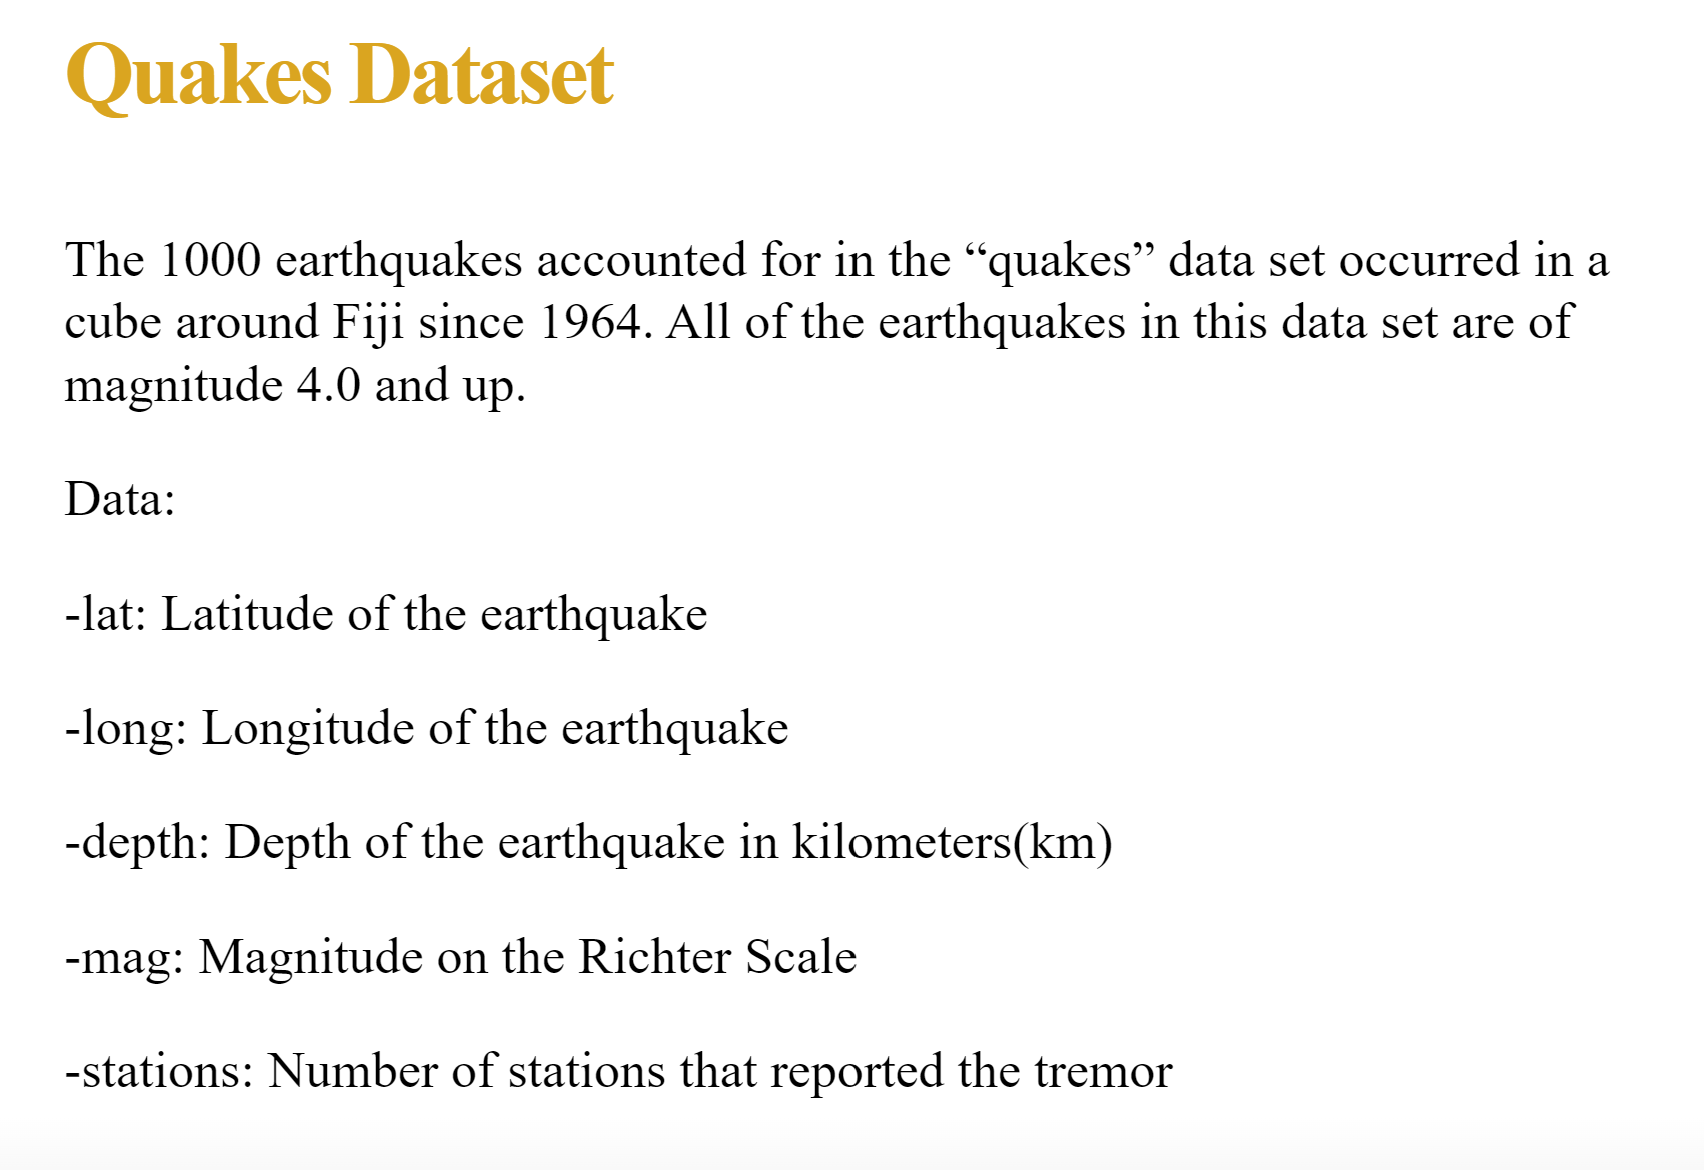

Check out the link:https://rpubs.com/TheFlyingDutchman/earthquake


In [1]:
import pandas as pd

In [2]:

link ='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/quakes.csv'

quakes = pd.read_csv(link)

quakes

,rownames,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


In [3]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1000 non-null   int64  
 1   lat       1000 non-null   float64
 2   long      1000 non-null   float64
 3   depth     1000 non-null   int64  
 4   mag       1000 non-null   float64
 5   stations  1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


# ***Basic*** Visualizations of the data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='depth', ylabel='mag'>

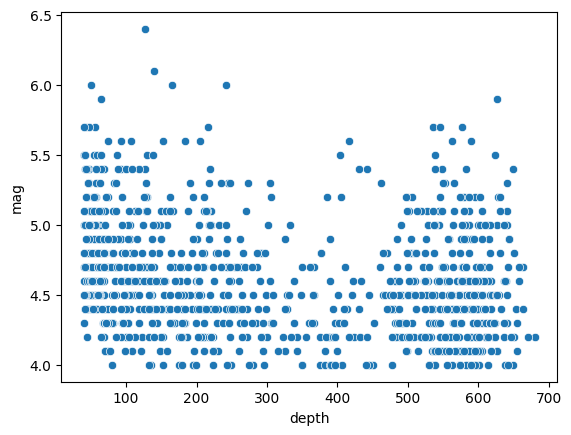

In [5]:
sns.scatterplot(x = 'depth' , y ='mag', data = quakes)

In [6]:
#Scatterplot of Depth vs Stations

<Axes: xlabel='depth', ylabel='stations'>

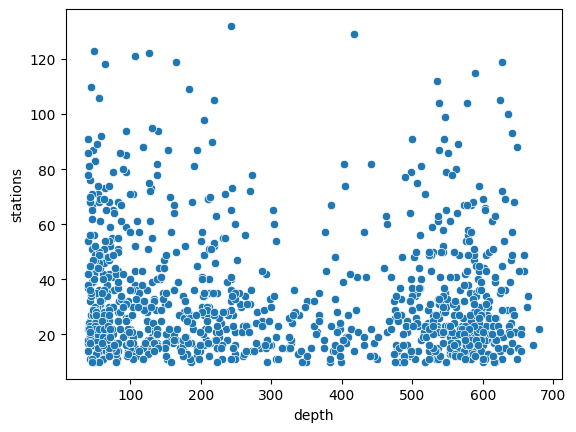

In [14]:
sns.scatterplot(x = 'depth' , y ='stations', data = quakes)

In [7]:
#Scatterplot of Mag vs Stations

In [8]:
quakes.corr()

,rownames,lat,long,depth,mag,stations
rownames,1.000000,-0.003081,0.026503,-0.059405,0.024818,0.092403
lat,-0.003081,1.000000,-0.364544,0.031026,-0.050462,-0.002221
long,0.026503,-0.364544,1.000000,0.144443,-0.173067,-0.053512
depth,-0.059405,0.031026,0.144443,1.000000,-0.230638,-0.073515
mag,0.024818,-0.050462,-0.173067,-0.230638,1.000000,0.851182
stations,0.092403,-0.002221,-0.053512,-0.073515,0.851182,1.000000


<Axes: xlabel='mag', ylabel='stations'>

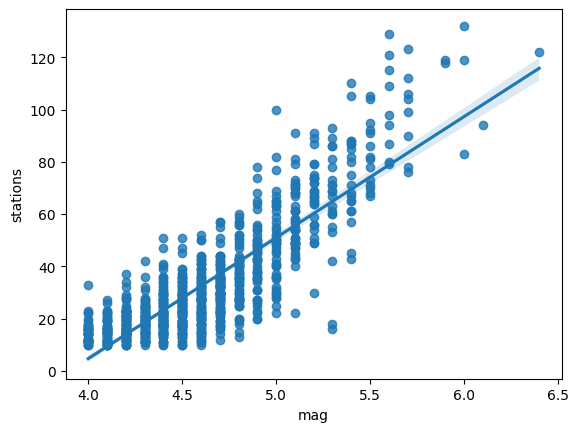

In [9]:
sns.regplot(x = 'mag' , y ='stations', data = quakes)

In [10]:
#import libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
Y = quakes['stations']
X = quakes['mag']
X = sm.add_constant(X)
reg = sm.OLS(Y,X).fit()
print (reg.summary() )

                            OLS Regression Results                            
Dep. Variable:               stations   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2625.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.21e-281
Time:                        17:34:38   Log-Likelihood:                -3860.3
No. Observations:                1000   AIC:                             7725.
Df Residuals:                     998   BIC:                             7734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -180.4243      4.190    -43.062      0.0

# **Bonus**
Use plotly to view location data

In [12]:
import plotly.express as px

In [15]:
fig = px.scatter_mapbox(quakes,
                        lon = quakes['long'],
                        lat = quakes['lat'],
                        zoom = 5,
                        color =quakes['mag'] ,
                        size = quakes['stations'],
                        width = 1000,
                        height = 1000,
                        title = 'Earthquake Map',
                        )

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {"r":0, "t":50})


fig.show()